# Author: Ayush Kakar

# Topic: Machine Learning " Hello World" Task 
 # Dataset: "Titanic- Machine Learning from Disaster"


# Importing the necessary libraries

In [275]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [276]:
from sklearn.ensemble import (RandomForestClassifier,
                             AdaBoostClassifier,
                             GradientBoostingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (GridSearchCV,
                                     cross_val_score,
                                     StratifiedKFold, 
                                     learning_curve)

## Loading the dataset

In [277]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['PassengerId']
print('Train shape : ',train.shape)
print('Test shape : ',test.shape)

Train shape :  (891, 12)
Test shape :  (418, 11)


In [278]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cleaning and preprocessing the dataset

In [280]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [281]:
train ['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [282]:
train['Embarked'].fillna('S',inplace=True)
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

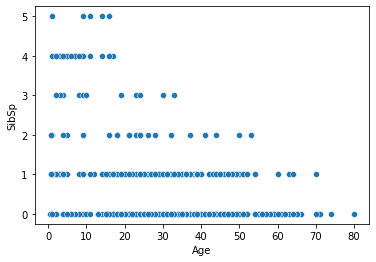

In [283]:
sns.scatterplot(x='Age',y='SibSp',data=train)

<AxesSubplot:xlabel='Age', ylabel='Parch'>

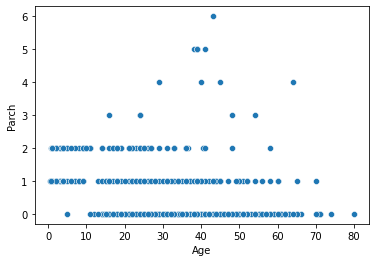

In [284]:
sns.scatterplot(x='Age',y='Parch',data=train)

In [285]:
train[['Age','SibSp']].groupby('SibSp').median()

,Age
SibSp,
0,29.0
1,30.0
2,23.0
3,9.5
4,6.5
5,11.0
8,NaN


In [286]:
train[['Age','SibSp']].groupby('SibSp').mean()

,Age
SibSp,
0,31.397558
1,30.089727
2,22.620000
3,13.916667
4,7.055556
5,10.200000
8,NaN


In [287]:
train[['Age','Parch']].groupby('Parch').median()

,Age
Parch,
0,30.0
1,23.0
2,16.5
3,24.0
4,42.5
5,39.0
6,43.0


In [288]:
train[['Age','Parch']].groupby('Parch').mean()

,Age
Parch,
0,32.178503
1,24.422000
2,17.216912
3,33.200000
4,44.500000
5,39.200000
6,43.000000


In [289]:
train[train['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [290]:
print('Mean of age is : ',train['Age'].mean())
print('Median of age is : ',train['Age'].median())

Mean of age is :  29.69911764705882
Median of age is :  28.0


In [291]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [292]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

# lets check the heatmap before decided about the cabin column


<AxesSubplot:>

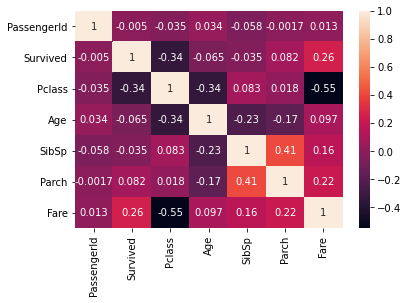

In [293]:
sns.heatmap(train.corr(),annot=True)

# Similarly, lets map the sex column

In [294]:
train['Sex'] = train['Sex'].map(lambda i : 1 if i=='male' else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [295]:
train['Embarked_S'] = train['Embarked'].map(lambda i: 1 if i=='S' else 0)
train['Embarked_C'] = train['Embarked'].map(lambda i: 1 if i=='C' else 0)
train['Embarked_Q'] = train['Embarked'].map(lambda i: 1 if i=='Q' else 0)
train.drop(['Embarked'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0,0


# Lets take a look at name feature


In [296]:
titles = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]

In [297]:
train['Title'] = pd.Series(titles)
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [298]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
the Countess      1
Mme               1
Lady              1
Capt              1
Jonkheer          1
Don               1
Sir               1
Name: Title, dtype: int64

In [299]:
rare_surnames = ['Rev','Col','Mlle','Don','Mme','Jonkheer','the Countess']
mapping_other_surnames = {'Mr':1,
                         'Mrs':2,
                         'Miss':2,
                         'Master':1,
                         'Dr':3,
                         'Col':1,
                         'Major':3,
                         'Ms':2,
                         'Lady':2,
                         'Capt':3,
                         'Sir':1,
                         'Rare':4}
train['Title'] = train['Title'].replace(rare_surnames,'Rare')
train['Title'] = train['Title'].map(mapping_other_surnames)
train['Title']=train['Title'].astype(int)

In [300]:
train['Title'].head()

0    1
1    2
2    2
3    2
4    1
Name: Title, dtype: int32

In [301]:
train.drop(['Name'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,2
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,1,0,0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,1,0,0,1


# Lets drop passenger Id and take a look at Cabin feature

In [302]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [303]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,2
3,1,1,0,35.0,1,0,113803,53.1000,C123,1,0,0,2
4,0,3,1,35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [304]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [305]:
train['Cabin'][1][0]

'C'

In [306]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
train['Cabin'].head()

0    X
1    C
2    X
3    C
4    X
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

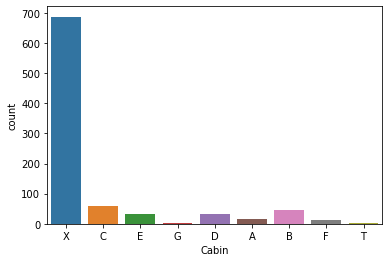

In [307]:
sns.countplot(train['Cabin'])

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

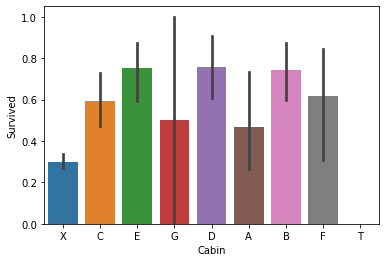

In [308]:
sns.barplot(x='Cabin',y='Survived',data=train)

In [309]:
train['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [310]:
train = pd.get_dummies(train,columns=['Cabin'],prefix='Cabin')

In [311]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_S,Embarked_C,...,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,1,0,A/5 21171,7.2500,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,0,1,...,2,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,0,...,2,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,1,0,...,2,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,373450,8.0500,1,0,...,1,0,0,0,0,0,0,0,0,1


In [312]:
train.drop(['Ticket'],axis=1,inplace=True)

In [313]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,1,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,2,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,2,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,2,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1


In [314]:
train.shape

(891, 20)

# Doing the same for test dataset. So instead of writing line by line, we can write a function which has all the lines same as training Eda and feature engineering.

In [315]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [316]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [317]:
test[test['Fare'].isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [318]:
test.shape

(418, 11)

In [319]:
# def __cleaner__(df):
test.drop(['PassengerId'],axis=1,inplace=True)

In [320]:
titles = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = pd.Series(titles)


In [321]:
test['Title'].isna().sum()

0

In [322]:
rare_surnames = ['Rev','Col','Mlle','Don','Mme','Jonkheer','the Countess']
mapping_other_surnames = {'Mr':1,
                         'Mrs':2,
                         'Miss':2,
                         'Master':1,
                         'Dr':3,
                         'Col':1,
                         'Major':3,
                         'Ms':2,
                         'Lady':2,
                         'Capt':3,
                         'Sir':1,
                         'Rare':4}
test['Title'] = test['Title'].replace(rare_surnames,'Rare')
test['Title'] = test['Title'].map(mapping_other_surnames)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [323]:
test.drop(['Name'],axis=1,inplace=True)

In [324]:
test.shape

(418, 10)

In [325]:
test['Sex'] = test['Sex'].map(lambda i : 1 if i=='male' else 0)

test['Embarked_S'] = test['Embarked'].map(lambda i: 1 if i=='S' else 0)
test['Embarked_C'] = test['Embarked'].map(lambda i: 1 if i=='C' else 0)
test['Embarked_Q'] = test['Embarked'].map(lambda i: 1 if i=='Q' else 0)
test.drop(['Embarked'],axis=1,inplace=True)

test.drop(['Ticket'],axis=1,inplace=True)

test['FamilySize'] = test['Parch'] + test['SibSp'] +1
test['Single'] = test['FamilySize'].map(lambda i: 1 if i==1 else 0)
test['Small'] = test['FamilySize'].map(lambda i: 1 if i==2 else 0)
test['Medium'] = test['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
test['Large'] = test['FamilySize'].map(lambda i: 1 if i>4 else 0)

test['Age'].fillna(test['Age'].median(),inplace=True)

In [326]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin']])
test = pd.get_dummies(test,columns=['Cabin'],prefix='Cabin')
print(test.shape)

(418, 23)


In [327]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
0,3,1,34.5,0,0,7.8292,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,0,47.0,1,0,7.0000,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,62.0,0,0,9.6875,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,1,27.0,0,0,8.6625,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,22.0,1,1,12.2875,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [328]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'FamilySize', 'Single', 'Small', 'Medium',
       'Large', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_X'],
      dtype='object')

In [329]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Title', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X'],
      dtype='object')

In [330]:
test.isna().sum().sort_values(ascending=False)

Title         1
Cabin_X       0
FamilySize    0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Single        0
Cabin_G       0
Small         0
Medium        0
Large         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Pclass        0
dtype: int64

In [331]:
train.isna().sum().sort_values(ascending=False)

Cabin_X       0
Cabin_T       0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Title         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Survived      0
dtype: int64

In [332]:
test[test['Title'].isna()==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
414,1,0,39.0,0,0,108.9,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [333]:
test['Title'].fillna('1',inplace=True)

In [334]:
test.isna().sum().sort_values(ascending=False)

Cabin_X       0
FamilySize    0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Single        0
Cabin_G       0
Small         0
Medium        0
Large         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Pclass        0
dtype: int64

In [335]:
test['Cabin_T']=0

<AxesSubplot:>

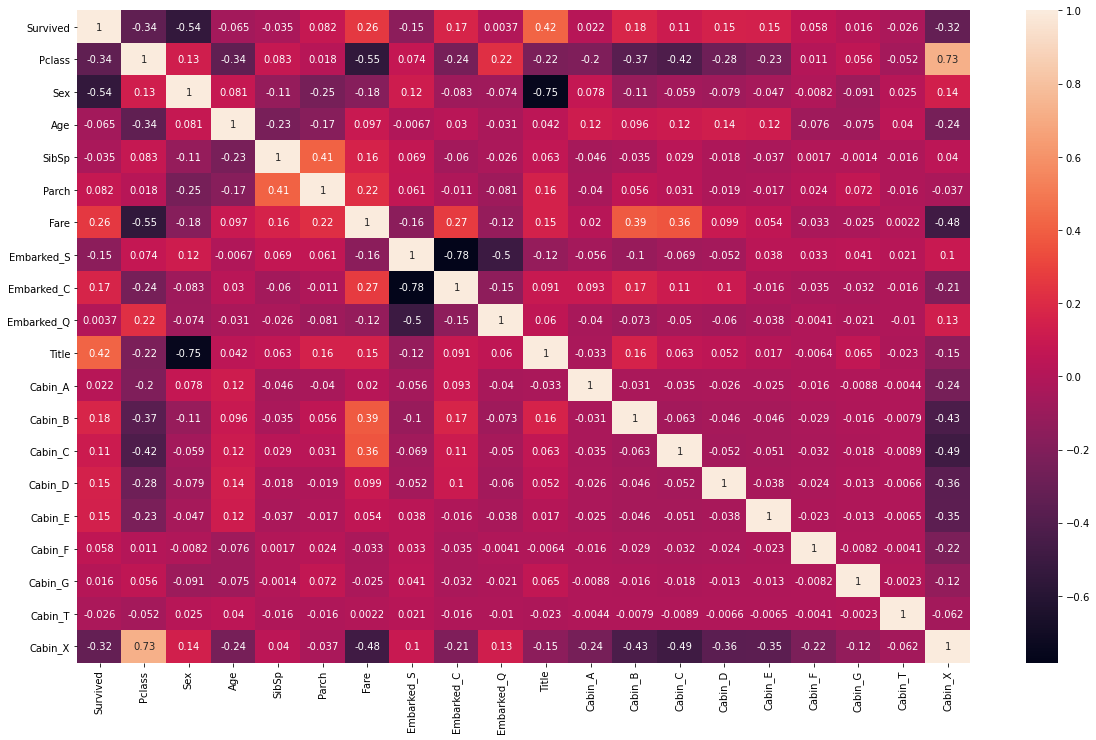

In [336]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

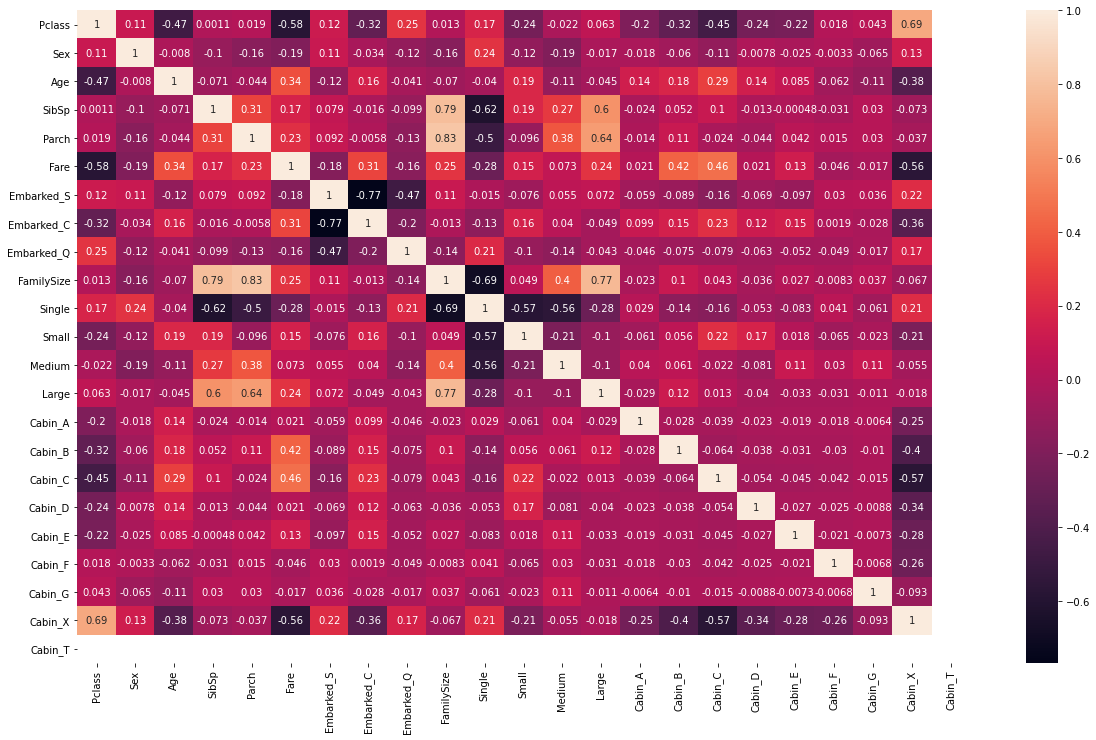

In [337]:
plt.figure(figsize=(20,12))
sns.heatmap(test.corr(),annot=True)

In [338]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X,Cabin_T
0,3,1,34.5,0,0,7.8292,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3,0,47.0,1,0,7.0000,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,1,27.0,0,0,8.6625,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0



## Model building and performing cross validation

In [339]:
len(train)

891

In [340]:
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
print('Shape of X_train is : ',X_train.shape)
print('Shape of Y_train is :',y_train.shape)

Shape of X_train is :  (891, 19)
Shape of Y_train is : (891,)


In [341]:
kfold = StratifiedKFold(n_splits=10)
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1),
    RandomForestClassifier(n_estimators=50),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto'),
    MLPClassifier(learning_rate='adaptive')
]

In [342]:
import warnings
warnings.filterwarnings('ignore')
results = []
for classifier in classifiers:
  results.append(cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=kfold,scoring='accuracy'))

In [343]:
results

[array([0.62222222, 0.58426966, 0.68539326, 0.74157303, 0.69662921,
        0.70786517, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ]),
 array([0.7       , 0.79775281, 0.69662921, 0.76404494, 0.78651685,
        0.78651685, 0.78651685, 0.71910112, 0.86516854, 0.82022472]),
 array([0.71111111, 0.78651685, 0.69662921, 0.79775281, 0.85393258,
        0.76404494, 0.80898876, 0.74157303, 0.88764045, 0.87640449]),
 array([0.74444444, 0.83146067, 0.75280899, 0.82022472, 0.84269663,
        0.83146067, 0.78651685, 0.7752809 , 0.88764045, 0.83146067]),
 array([0.8       , 0.82022472, 0.75280899, 0.84269663, 0.88764045,
        0.82022472, 0.82022472, 0.79775281, 0.88764045, 0.84269663]),
 array([0.64444444, 0.71910112, 0.6741573 , 0.71910112, 0.74157303,
        0.73033708, 0.7752809 , 0.75280899, 0.70786517, 0.79775281]),
 array([0.77777778, 0.79775281, 0.78651685, 0.84269663, 0.78651685,
        0.76404494, 0.79775281, 0.78651685, 0.84269663, 0.79775281]),
 array([0.75555556, 0.78651685, 0.

In [344]:
mean = []
std = []
for result in results:
  mean.append(result.mean())
  std.append(result.std())

result_df = pd.DataFrame({'Cross Validation Mean':mean,'Cross Validation Error':std,'Algorithms':['Suppor vector classifier',
                                                                                                  'Decision Tree classifier',
                                                                                                  'AdaBoosting classifier',
                                                                                                  'Random forest classifier',
                                                                                                  'Gradient boosting',
                                                                                                  'K Neighbours classifier',
                                                                                                  'Logistic Regression classifier',
                                                                                                  'Linear discriminant analysis',
                                                                                                  'Multi layer perceptron classifier']})
result_df

,Cross Validation Mean,Cross Validation Error,Algorithms
0,0.682447,0.044367,Suppor vector classifier
1,0.772247,0.051017,Decision Tree classifier
2,0.792459,0.062785,AdaBoosting classifier
3,0.810400,0.042317,Random forest classifier
4,0.827191,0.038824,Gradient boosting
5,0.726242,0.042801,K Neighbours classifier
6,0.798002,0.024399,Logistic Regression classifier
7,0.794657,0.028941,Linear discriminant analysis
8,0.757703,0.053782,Multi layer perceptron classifier


<AxesSubplot:xlabel='Cross Validation Mean', ylabel='Algorithms'>

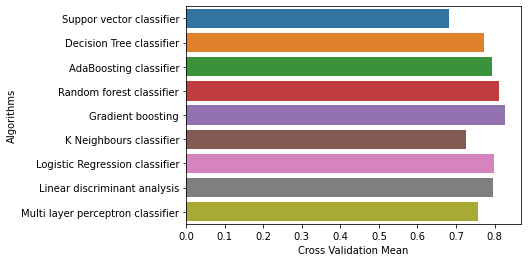

In [345]:
sns.barplot(x='Cross Validation Mean',y='Algorithms',data=result_df)